In [1]:
# files to include:
# any pickle files that end in .pt and contain the word mimic (excluding mimic_copy)
# any pickles, e.g. ./experiments/pickles/mimic3_*_explainer_42_*.pt
# any checkpoints. e.g experiments/checkpoints/mimic3_classifier_42_*.ckpt


# any checkpoints for the classifiers
# hmm_results_per_fold.csv, experiments/hmm/reproducibility_results/hmm_original_results.csv


from multiprocessing import Process

import experiments.hmm.main
import experiments.hmm.reset
import experiments.mimic3.mortality.main
import experiments.mimic3.mortality.reset
import torch as th
from experiments.utils.average_results import average_main_experiment

## Claim 1

**Claim 1**. On a synthetic dataset HMM, ExtremalMask best identified the non-salient features compared to 9 other methods, as measured by the relevant tested metrics, besides AUP.

### Table 1

Next, we create Table 1, the metrics table for the hmm dataset.

Unfortunately, we did not save the checkpoints/pickles of explainer models other than ExtremalMask and DynaMask. To reproduce, we have provided job files for Snellius in the repository, but it takes ~10 hours to run the rest of the experiments on 1 powerful GPU and 9 CPUs. 

**Note!** It's important to use a device with a GPU and CUDA to reproduce these results. We have run into issues reproducing the exact same results as reported in our paper whilst evaluating on CPU even though use the exact same code and procedure as we did on the computer cluster which had a GPU.. Specifically, here are example results when run on CPU:

```csv
Seed,Fold,Explainer,Lambda_1,Lambda_2,AUP,AUR,Information,Entropy,AUROC,AUPRC
42,0,dyna_mask,1.0,1.0,0.3558,0.7407,9.902e+04,2.598e+04,0.5718,0.388
42,0,extremal_mask,1.0,1.0,0.5173,0.4323,1.645e+05,5.447e+03,0.644,0.4634
```

And the corresponding models evaluated on GPU:
```csv
Seed,Fold,Explainer,Lambda_1,Lambda_2,AUP,AUR,Information,Entropy,AUROC,AUPRC
42,0,dyna_mask,1.0,1.0,0.3731,0.7712,1.049e+05,2.528e+04,0.6164,0.4181
42,0,extremal_mask,1.0,1.0,0.9167,0.7638,2.954e+05,7.595e+03,0.913,0.893
```


In [2]:
device = "cuda" if th.cuda.is_available() else "cpu"

# Uncomment the other methods to train them
explainers = [
    # "deep_lift",
    "dyna_mask",
    "extremal_mask",
    # "fit",
    # "gradient_shap",
    # "integrated_gradients",
    # "augmented_occlusion",
    # "occlusion",
    # "retain",
    # "lime",
]
output_file = "hmm_results_per_fold.csv"
experiments.hmm.reset.main()
for i in range(5):
    experiments.hmm.main.main(
        explainers, device, deterministic=True, fold=i, output_file=output_file
    )

Global seed set to 42
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


/Users/lukecadigan/courses/fact/repo/tint/data/hmm
classifier has loaded the saved weights on hmm dataset with fold = 0, if applicable, lambda 1 = 1.0 and lambda 2 = 1.0.
dyna_mask has loaded the saved weights on hmm dataset with fold = 0, if applicable, lambda 1 = None and lambda 2 = None.


Predicting: 0it [00:00, ?it/s]

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Global seed set to 42
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Best keep ratio is 0.30000000000000004
extremal_mask has loaded the saved weights on hmm dataset with fold = 0, if applicable, lambda 1 = 1.0 and lambda 2 = 1.0.
/Users/lukecadigan/courses/fact/repo/tint/data/hmm
classifier has loaded the saved weights on hmm dataset with fold = 1, if applicable, lambda 1 = 1.0 and lambda 2 = 1.0.


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


dyna_mask has loaded the saved weights on hmm dataset with fold = 1, if applicable, lambda 1 = None and lambda 2 = None.


Predicting: 0it [00:00, ?it/s]

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Global seed set to 42
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Best keep ratio is 0.30000000000000004
extremal_mask has loaded the saved weights on hmm dataset with fold = 1, if applicable, lambda 1 = 1.0 and lambda 2 = 1.0.
/Users/lukecadigan/courses/fact/repo/tint/data/hmm
classifier has loaded the saved weights on hmm dataset with fold = 2, if applicable, lambda 1 = 1.0 and lambda 2 = 1.0.


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


dyna_mask has loaded the saved weights on hmm dataset with fold = 2, if applicable, lambda 1 = None and lambda 2 = None.


Predicting: 0it [00:00, ?it/s]

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Global seed set to 42
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Best keep ratio is 0.30000000000000004
extremal_mask has loaded the saved weights on hmm dataset with fold = 2, if applicable, lambda 1 = 1.0 and lambda 2 = 1.0.
/Users/lukecadigan/courses/fact/repo/tint/data/hmm
classifier has loaded the saved weights on hmm dataset with fold = 3, if applicable, lambda 1 = 1.0 and lambda 2 = 1.0.


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


dyna_mask has loaded the saved weights on hmm dataset with fold = 3, if applicable, lambda 1 = None and lambda 2 = None.


Predicting: 0it [00:00, ?it/s]

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Global seed set to 42
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Best keep ratio is 0.30000000000000004
extremal_mask has loaded the saved weights on hmm dataset with fold = 3, if applicable, lambda 1 = 1.0 and lambda 2 = 1.0.
/Users/lukecadigan/courses/fact/repo/tint/data/hmm
classifier has loaded the saved weights on hmm dataset with fold = 4, if applicable, lambda 1 = 1.0 and lambda 2 = 1.0.


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


dyna_mask has loaded the saved weights on hmm dataset with fold = 4, if applicable, lambda 1 = None and lambda 2 = None.


Predicting: 0it [00:00, ?it/s]

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Best keep ratio is 0.30000000000000004
extremal_mask has loaded the saved weights on hmm dataset with fold = 4, if applicable, lambda 1 = 1.0 and lambda 2 = 1.0.


After having run the experiment, the results for each fold are to be found in `hmm_results_per_fold.csv` under the same folder as this notebook. Now, we calculate the average together with the standard deviation for every model. 

We will assume you didn't run the experiment, and use our saved file for the calculations of averages. 

In [3]:
# Change this to your file to calculate the means and stds for it
results_file = "hmm_results_per_fold_saved.csv"
average_main_experiment(results_file)

The results that we present in Table 1 may be found in `${results_file}_averaged.csv`, e.g. `hmm_results_per_fold_saved_averaged.csv`, under the same folder as this notebook.

### Table 2

Comparison between our averaged results (over 5 folds, detailed in Table 1) and the authors’ reported values. The values are calculated by dividing these differences by the standard deviation found in the original paper.

In [4]:
from experiments.utils.compare_results import compare_results

dataset_name = "hmm"
# File for the results from original paper
original_results_filename = "hmm_original_results.csv"
# File for our computed results
repro_results_filename = "hmm_results_per_fold_saved_averaged.csv"

compare_results(
    dataset_name, original_results_filename, repro_results_filename, ratio_mode=True
)

The result for table 2 can now be found in `hmm_results_per_fold_saved_averaged_ratio.csv`.

## Claim 2

**Claim 2**. On a real-life dataset (MIMIC-III, Section 3.2.3), ExtremalMask best identified the salient and non-salient features compared to 8 other methods, as measured by the relevant tested metrics.

### Table 3 

First, we reproduce Table 3, the metrics table for the mimic dataset. Because we were able to save our models, this code may take to run around 20 minutes for 1 fold. Otherwise, you would have to still train the explainers. Still, below the results are presented for only 1 fold, but you can run them for 5 folds as we do for our paper if you have the time.

In [5]:
device = "cuda" if th.cuda.is_available() else "cpu"

mimic_explainers = [
    "deep_lift",
    "dyna_mask",
    "extremal_mask",
    "integrated_gradients",
    "augmented_occlusion",
    "occlusion",
    "retain",
]
mimic_output_file = "mimic_results.csv"
experiments.mimic3.mortality.reset.main("main")

# We only saved pickles for all modelss for folds 1 and 2.
# folds_to_run = [1, 2]

# Run only for fold 1 since this takes quite some time
# The at is the reason why confidence intervals are not shown
folds_to_run = [1]

# Some models like augmented occlusion, extremal mask, dyna mask also have fold 0 saved

for i in folds_to_run:
    experiments.mimic3.mortality.main.main(
        explainers=mimic_explainers,
        areas=[
            0.1,
            0.2,
            0.3,
            0.4,
            0.5,
            0.6,
        ],
        device="cpu",
        fold=i,
        seed=42,
        deterministic=True,
        output_file=mimic_output_file,
    )

Global seed set to 42
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


experiment is  main
classifier has loaded the saved weights on mimic3 dataset with fold = 1, if applicable, lambda 1 = 1.0 and lambda 2 = 1.0.
y_test mean tensor(0.0900)
explainers is  ['deep_lift', 'dyna_mask', 'extremal_mask', 'integrated_gradients', 'augmented_occlusion', 'occlusion', 'retain']
starting deeplift
finished analyzing  deep_lift output to  mimic_results.csv
finished analyzing  dyna_mask output to  mimic_results.csv
finished analyzing  extremal_mask output to  mimic_results.csv
finished analyzing  integrated_gradients output to  mimic_results.csv
finished analyzing  occlusion output to  mimic_results.csv
finished analyzing  retain output to  mimic_results.csv


Now that we've created `mimic_results.csv`, we can create Table 3, the metrics table for MIMIC-III. We also reproduce the cross-entropy graphs from the original paper. Because we only run fold 1 (to save you time, you can run both folds by setting run_both to true), the standard deviation is 0, and thus confidence intervals are not displayed as they are in our paper. 

values for table: 
      DeepLift Accuracy 0.990, Comprehensiveness 8.07e-04, Cross Entropy 0.09, Sufficiency 3.78e-03, 

      DynaMask Accuracy 0.993, Comprehensiveness 4.15e-03, Cross Entropy 0.10, Sufficiency 8.08e-04, 

      Integrated Gradients Accuracy 0.989, Comprehensiveness 1.46e-03, Cross Entropy 0.09, Sufficiency 3.13e-03, 

      Augmented Occlusion Accuracy 0.990, Comprehensiveness 1.89e-03, Cross Entropy 0.09, Sufficiency 2.33e-03, 

      Occlusion Accuracy 0.990, Comprehensiveness -4.36e-04, Cross Entropy 0.09, Sufficiency 4.89e-03, 

      Retain Accuracy 0.990, Comprehensiveness -1.86e-03, Cross Entropy 0.09, Sufficiency 7.18e-03, 

      \hline
      Extremal Mask Accuracy 0.986, Comprehensiveness 1.21e-02, Cross Entropy 0.11, Sufficiency -7.48e-03, 

Cross entropy (change in prediction) over % features masked, *average* baseline


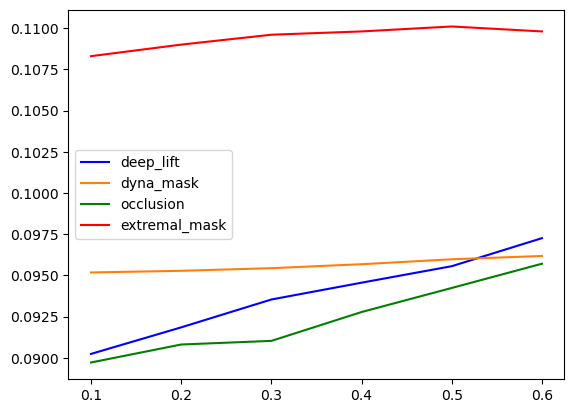

Cross entropy (change in prediction) over % features masked, *zero* baseline


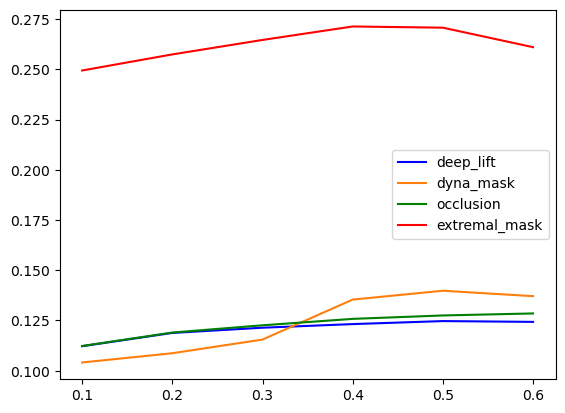

In [6]:
from experiments.mimic3.mortality.graphs import (
    create_mimic_graph,
    get_mimic_data,
    print_mimic_table,
)

total_raw_values = get_mimic_data(mimic_output_file)
print("values for table: ")
print_mimic_table(total_raw_values)
print("Cross entropy (change in prediction) over % features masked, *average* baseline")
create_mimic_graph(total_raw_values, "Average")

print("Cross entropy (change in prediction) over % features masked, *zero* baseline")
create_mimic_graph(total_raw_values, "Zeros")

## Claim 3

**Claim 3**. ExtremalMask achieves better performance in the preservation game compared to the deletion game on the synthetic dataset.

### Table 4

To reproduce the result, we follow the same procedure as that for Table 1 except also setting the `preservation_mode` argument to `False` to perform deletion game. It will take several hours, so we don't recommend running it. 

**Note!** As for Table 1, it's again important to use a device with GPU and CUDA to reproduce our results.

In [7]:
output_file = "hmm_results_per_fold_deletion.csv"
experiments.hmm.reset.main("deletion")

for i in range(5):
    experiments.hmm.main.main(
        "extremal_mask",
        device,
        deterministic=True,
        fold=i,
        output_file=output_file,
        preservation_mode=False,
    )

average_main_experiment(output_file)
# If you get a TypeError running this line, simply rerun the function after adding the CSV header:
# Seed,Fold,Explainer,Lambda_1,Lambda_2,AUP,AUR,Information,Entropy,AUROC,AUPRC

Global seed set to 42
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


/Users/lukecadigan/courses/fact/repo/tint/data/hmm
classifier has loaded the saved weights on hmm dataset with fold = 0, if applicable, lambda 1 = 1.0 and lambda 2 = 1.0.


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Global seed set to 42
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


extremal_mask has loaded the saved weights on hmm dataset with fold = 0, if applicable, lambda 1 = 1.0 and lambda 2 = 1.0.
/Users/lukecadigan/courses/fact/repo/tint/data/hmm
classifier has loaded the saved weights on hmm dataset with fold = 1, if applicable, lambda 1 = 1.0 and lambda 2 = 1.0.


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Global seed set to 42
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


extremal_mask has loaded the saved weights on hmm dataset with fold = 1, if applicable, lambda 1 = 1.0 and lambda 2 = 1.0.
/Users/lukecadigan/courses/fact/repo/tint/data/hmm
classifier has loaded the saved weights on hmm dataset with fold = 2, if applicable, lambda 1 = 1.0 and lambda 2 = 1.0.


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Global seed set to 42
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


extremal_mask has loaded the saved weights on hmm dataset with fold = 2, if applicable, lambda 1 = 1.0 and lambda 2 = 1.0.
/Users/lukecadigan/courses/fact/repo/tint/data/hmm
classifier has loaded the saved weights on hmm dataset with fold = 3, if applicable, lambda 1 = 1.0 and lambda 2 = 1.0.


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Global seed set to 42
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


extremal_mask has loaded the saved weights on hmm dataset with fold = 3, if applicable, lambda 1 = 1.0 and lambda 2 = 1.0.
/Users/lukecadigan/courses/fact/repo/tint/data/hmm
classifier has loaded the saved weights on hmm dataset with fold = 4, if applicable, lambda 1 = 1.0 and lambda 2 = 1.0.


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


extremal_mask has loaded the saved weights on hmm dataset with fold = 4, if applicable, lambda 1 = 1.0 and lambda 2 = 1.0.


The results that we present in Table 4 may now be found in `hmm_results_per_fold_deletion_averaged.csv` under the same folder as this notebook.